#### **Name     : Deep Walke**
#### **Roll No. : BT19CSE122**
#### **Date Of Submission: 24/02/2022**
#### **IVP PROGRAMMING ASSIGNMENT-1**

In [1]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt


**Q1: Write a computer program capable of zooming and shrinking an image by pixel replication. Assume that 
the desired zoom/shrink factors are integers. Take any image and use your program to shrink the image by a 
factor of 10. Use your program to zoom the image back to the resolution of the original. Explain the reasons 
for their differences. Use provided lena_gray_256.jpg image for experimentation**

In [37]:
# function for enlarging/zooming an image by a factor of f
def enlarge(img,f):
    #getting width and height of the original image
    w, h = img.shape[:2];

    # xNew and yNew are new width and height of image required after scaling
    xNew = int(w * (f));
    yNew = int(h * (f));
    
    #creating a new image to store the enlarged image.
    #new image is intialised by zeros initially
    enlargedImage = np.zeros((xNew, yNew),dtype='uint8');
    
    #traversing through the new image and assigning it the pixels from original image
    #i//f and j//f will give the floor division of i/f and will help to
    #to do pixel replication to enlarge the image.
    for i in range(0,xNew):
        for j in range(0,yNew):
                enlargedImage[i][j]= img[i//f,j//f]

    return enlargedImage

In [38]:
# function for shrinking an image by a factor of f
def shrink(img,f):
    #getting width and height of the original image
    w, h = img.shape[:2];

     # xNew and yNew are new width and height of image required after scaling
    xNew = int(w // (f));
    yNew = int(h // (f));
    
     #creating a new image to store the enlarged image.
    #new image is intialised by zeros initially
    shrinkedImage = np.zeros((xNew, yNew),dtype='uint8');

    #traversing through the new image and assigning it the pixels from original image
    # to shrink an image we have to skip few pixels and assign the few to the new image.
    #here we are doing pixel replication to shrink the image.
    for i in range(0,xNew):
        for j in range(0,yNew):
            shrinkedImage[i,j]= img[i*f,j*f]

    return shrinkedImage;

Text(0.5, 1.0, 'Enlarged Image')

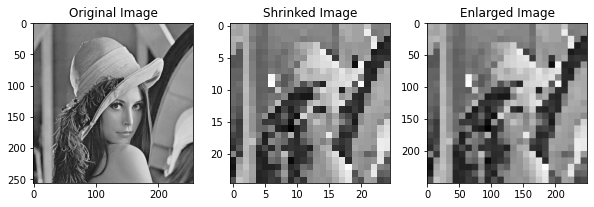

In [39]:
#getting the original image
img= cv2.imread('lena_gray_256.tif',0)
fig=plt.figure(figsize=(10,10))
plt.gray()
fig.add_subplot(3,3,1)
plt.imshow(img)
plt.title("Original Image")

#shrinking the original image
shrinkedImage=shrink(img,10);
fig.add_subplot(3,3,2)
plt.imshow(shrinkedImage)
plt.title("Shrinked Image")

#enlarging the shrinked image
enlargedImage=enlarge(shrinkedImage,10);
fig.add_subplot(3,3,3)
plt.imshow(enlargedImage)
plt.title("Enlarged Image")

**Q2: The function domIntensity(im, k) takes an image im and an integer k and returns a list of k most 
frequently occurring graylevel intensity in that image.**
**1. Implement the function. The code should work for grayscale images.**
**2. Implement a display function which takes the image im as input, the list returned by domIntensity(im, k) 
and displays the image, the most dominant graylevel intensity and the palette of k dominant intensities (see 
Figure 1).**

In [43]:
def domIntensity(im,k):
    #here we are using a dictionary(key->value) pair
    #intensityVal(intensityValue-> number of pixels with this intensity) 
    #where initially we will have all 0-255 keys initialised with 0
    
    intensityVal = {}
    kMostFrequent=[]
    
    #initializing dictionary
    for i in range(0,256):
        intensityVal[i]=0;
    
    #getting width and height of the image im
    w=im.shape[0]
    h=im.shape[1]
    
    #incrementing the count if for all the pixels
    for i in range(0,w):
        for j in range(0,h):
            intensityVal[im[i][j]]+=1;
    
    
    #sorting the dictionary based on its values and in reverse order(descending order)
    #so that we can get k highest/frequent values
    intensityVal=sorted(intensityVal.items(), key = lambda kv:(kv[1], kv[0]),reverse=True);
    
    #we have a list kMostFrequent 
    #where we are appending first k keys(i.e. intensity values)
    
    a=0;
    for key,val in intensityVal:
        if(a>k):
            break    
        kMostFrequent.append(key);
        a+=1;

    
    return kMostFrequent;
    

In [58]:

def displayFunction(im,kMostFrequent):
    
    #displaying the original image
    fig=plt.figure(figsize=(10,10))
    plt.gray()
    fig.add_subplot(3,1,1)
    plt.imshow(img)
    plt.title("Original Image")
    
    #displaying the dominant Intensity
    dominantIntensity=kMostFrequent[0]*np.ones((256,256))
    fig.add_subplot(3,1,2)
    plt.imshow(dominantIntensity)
    plt.title("Dominant Intensity")
    
    #creating a color palette from kMostFrequent Intesities and displaying it
    color = np.zeros((40,40),dtype='uint8')
    palette = np.ones((256,256))
    for i in kMostFrequent:
        color = i*np.ones((256,256))
        palette = np.concatenate((palette,color),axis=1)
    palette=palette[:,256:]
    fig.add_subplot(3,1,3)
    plt.imshow(palette)
    plt.title("PALETTE")
    
    
    

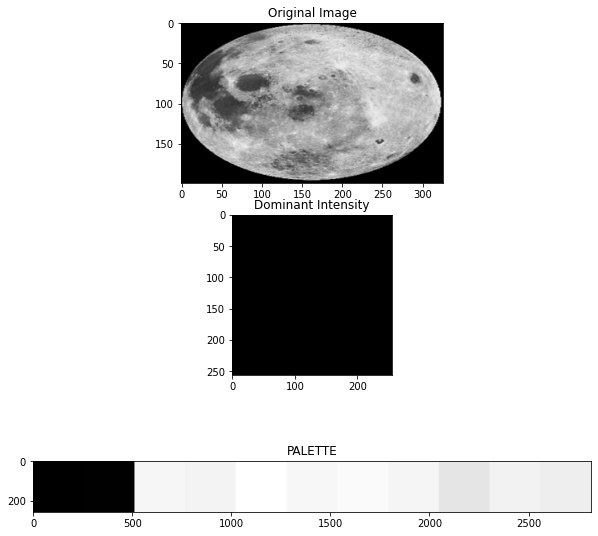

In [61]:
#reading image
img=cv2.imread('fullmoon.tiff',0)

kMostFrequent=domIntensity(img,10);
displayFunction(img,kMostFrequent);


**Q3: Consider Roberts, Prewitt, Sobel, Laplacian filters (shown in the below image). Apply these filters on 
Building.jpg and make observations upon comparing their outputs. You are allowed to do the same with an image of 
your own choice.**


In [2]:
def applyFilter(img,filter):
    x=img.shape[0]
    y=img.shape[1]
    filter_size=filter.shape[0]
    
    n=filter_size//2
    
    #initalizing the final image that we will obtain after applying the filter
    imgAfterFilter=np.zeros(img.shape)
    # creating a padded image of the given image adn initialised with 0
    paddedImage=np.zeros((x+n*2,y+n*2))
    
    #now assinging the pixes of original image to padded image 
    #such that padded image will be an image which has border of black color(as intialized with zeros).
    for i in range(x):
        for j in range(y):
            paddedImage[n+i][n+j]=img[i][j];
    
    #now traversing through the and applying filter to the padded image 
    for i in range(x):
        for j in range(y):
            imgAfterFilter[i][j]=np.sum(np.multiply(filter, paddedImage[i:i + filter_size, j:j + filter_size]))
    
    return imgAfterFilter;



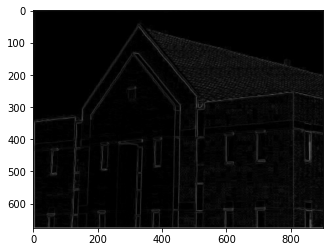

In [3]:
#prewitt filter
img=cv2.imread('Building.jpg',0)
prewittX = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],np.float32)/9

iX = applyFilter(img, prewittX)

prewittY = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]],np.float32)/9

iY = applyFilter(img, prewittY)

#calculating the hypotenuse
image_out=np.sqrt(iX**2 + iY**2)

#setting the data type of image to uint8 from float32 as pixels can be negative in float
image_out=np.array(image_out).astype("uint8")
plt.gray()
plt.imshow(image_out)


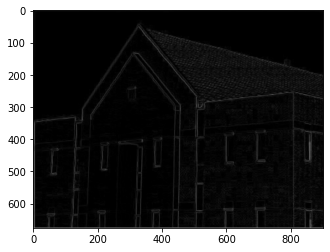

In [4]:
#sobel filter
img=cv2.imread('Building.jpg',0)
sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],np.float32)/9

iX = applyFilter(img, sobelX)

sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]],np.float32)/9

#calculating the hypotenuse
iY = applyFilter(img, sobelY)
image_out=np.sqrt(iX**2 + iY**2)
#setting the data type of image to uint8 from float32 as pixels can be negative in float
image_out=np.array(image_out).astype("uint8")
plt.gray()
plt.imshow(image_out)

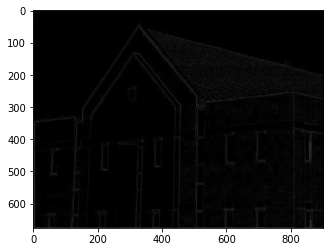

In [5]:
#Roberts filter
img=cv2.imread('Building.jpg',0)
robertX = np.array([[0,1],[-1,0]],np.float32)/4

iX = applyFilter(img, robertX)

robertY = np.array([[1,0],[0,-1]],np.float32)/4

iY = applyFilter(img, robertY)
#calculating the hypotenuse
image_out=np.sqrt(iX**2 + iY**2)
#setting the data type of image to uint8 from float32 as pixels can be negative in float
image_out=np.array(image_out).astype("uint8")
plt.gray()
plt.imshow(image_out)

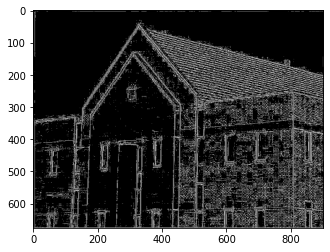

In [6]:
#laplacian operator
img=cv2.imread('Building.jpg',0)
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]],np.float32)/9

output = applyFilter(img, laplacian)
#setting the data type of image to uint8 from float32 as pixels can be negative in float
output=np.array(output).astype("uint8")
plt.gray()
plt.imshow(output)

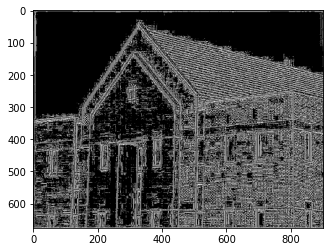

In [7]:
#laplacian operator 2
img=cv2.imread('Building.jpg',0)
laplacianDiag = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],np.float32)/9

output = applyFilter(img, laplacianDiag)
#setting the data type of image to uint8 from float32 as pixels can be negative in float
output=np.array(output).astype("uint8")
plt.gray()
plt.imshow(output)

**Q4: Enhance the ‘skeleton.jpg’ image by performing the sequence of operations as given below or any other 
alternative method. Make note of the observations in each step.**

Text(0.5, 1.0, 'h) Enhanced Image by applying power-law transformation')

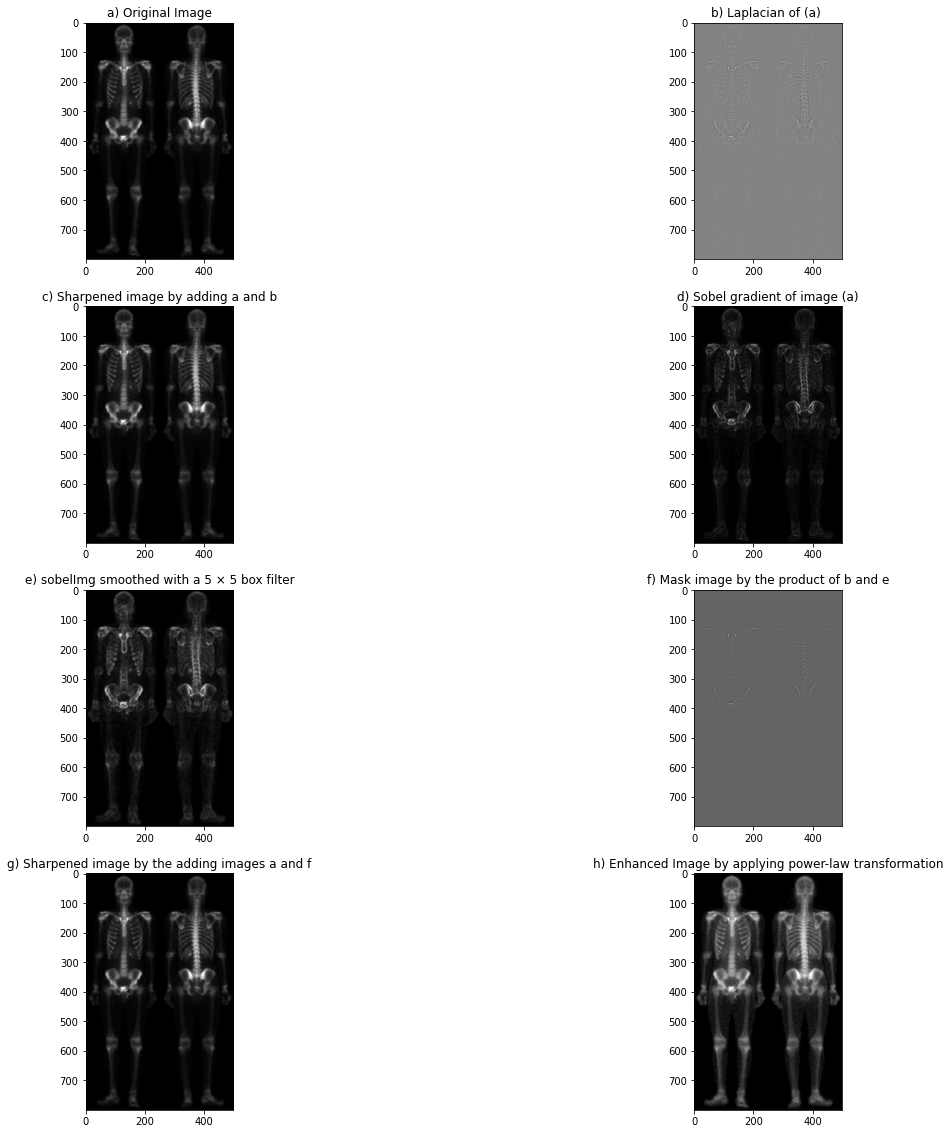

In [10]:
#a
#read image of whole body bone scan
img=cv2.imread('skeleton.tif',0)
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,2,1)
plt.imshow(img)
plt.title("a) Original Image")

#b
#Laplacian of (a) i.e img
laplacianImg = applyFilter(img, laplacian)/9;
fig.add_subplot(4,2,2)
plt.imshow(laplacianImg)
plt.title("b) Laplacian of (a) ")

#c
# Sharpened image obtained by adding (a i.e img) and (b i.e laplacianImg).
sharpImgC=laplacianImg+img;
fig.add_subplot(4,2,3)
plt.imshow(sharpImgC)
plt.title("c) Sharpened image by adding a and b")

#d
#Sobel gradient of image (a i.e img).
sobelImgX = applyFilter(img,sobelX)/9;

sobelImgY = applyFilter(img,sobelY)/9;
sobelImg = np.sqrt(sobelImgX**2 + sobelImgY**2)
fig.add_subplot(4,2,4)
plt.imshow(sobelImg)
plt.title("d) Sobel gradient of image (a)")

#e
#sobelImg smoothed with a 5 × 5 box filter.
boxFilter=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]],np.float32)/25
# img_e = convolve2d(img_d,boxFilter)
smoothSobel=applyFilter(sobelImg,boxFilter)/25;

fig.add_subplot(4,2,5)
plt.imshow(smoothSobel)
plt.title("e) sobelImg smoothed with a 5 × 5 box filter")

# f
#Mask image formed by the product of (b i.e laplacianImg) and (e i.e. smoothSobel).
maskImgF = np.multiply(laplacianImg,smoothSobel);

fig.add_subplot(4,2,6)
plt.imshow(maskImgF)
plt.title("f) Mask image by the product of b and e")


#g
#Sharpened image obtained by the adding images (a i.e. img) and (f i.e. maskImgF).
sharpImgG=img+maskImgF;
fig.add_subplot(4,2,7)
plt.imshow(sharpImgG)
plt.title("g) Sharpened image by the adding images a and f")


#h
#Final result obtained by applying a power-law transformation to (g i.e. sharpImgG).
final_op = cv2.pow(sharpImgG,0.6);
final_op=np.array(final_op).astype("uint8")
fig.add_subplot(4,2,8)
plt.imshow(final_op)
plt.title("h) Enhanced Image by applying power-law transformation")

Text(0.5, 1.0, 'Enhanced Image')

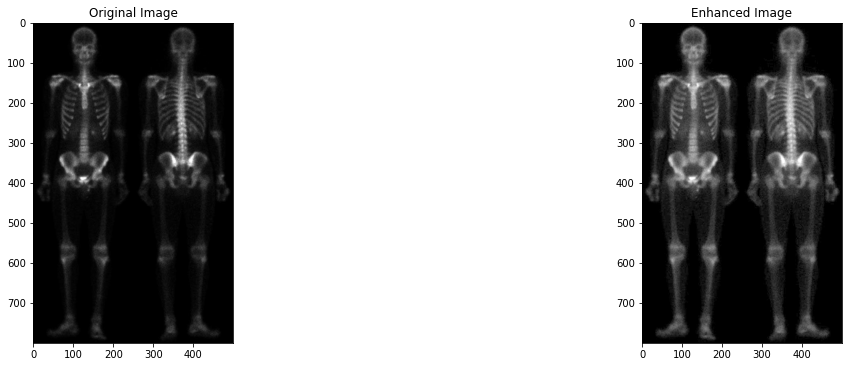

In [11]:
# Go get the more clear view between original and final enhanced image
# displaying original image
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(3,2,1)
plt.imshow(img)
plt.title("Original Image")

#enhanced image
fig.add_subplot(3,2,2)
plt.imshow(final_op)
plt.title("Enhanced Image")


**Q5: Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max. 
Apply the appropriate filter for the given noise images to enhance the image quality. Use images 
Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs.**


In [80]:
#a function to add padding to an image, for a given filter size

def paddingImages(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    
    n=filter_size//2
    
    # creating a padded image of the given image
    paddedImage=np.zeros((x+n*2,y+n*2))
    
    #now assinging the pixes of original image to padded image 
    #such that padded image will be an image which has border of black color(as intialized with zeros).
    for i in range(x):
        for j in range(y):
            paddedImage[n+i][n+j]=img[i][j];
    
    return paddedImage;

In [81]:
def maxFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    maxFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the maximum value from a filter_size*filter_size matrix of paddedImage
    for i in range(n,n+x):
        for j in range(n,n+y):
            maxFilterImage[i-n][j-n]=np.max(paddedImage[i-n:i+n+1,j-n:j+n+1])
    return maxFilterImage;

In [82]:
def minFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    minFilterImage=np.zeros(img.shape);
     #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the minimum value from a filter_size*filter_size matrix of paddedImage
    for i in range(n,n+x):
        for j in range(n,n+y):
            minFilterImage[i-n][j-n]=np.min(paddedImage[i-n:i+n+1,j-n:j+n+1])
    return minFilterImage;

In [83]:
def meanFilter(img,filter_size): 
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2
    
    #initalizing the final image that we will obtain after applying the spatial filter
    meanFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the mean value from a filter_size*filter_size matrix of paddedImage,
    #we changed the datatype to float32
    for i in range(n,n+x):
        for j in range(n,n+y):
            meanFilterImage[i-n][j-n]=np.mean(paddedImage[i-n:i+n+1,j-n:j+n+1],dtype=np.float32)
    return meanFilterImage;

In [84]:
def medianFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    medianFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #here for every filter_size*filter_size matrix
    #we are using .flatten() to flatten the matrix
    #then we are sorting that falttened matrix and then the median of 
    #this matrix is assigned to final-image.
    for i in range(n,n+x):
        for j in range(n,n+y):
            temp=(paddedImage[i-n:i+n+1,j-n:j+n+1]).flatten()
            temp.sort()
            medianFilterImage[i-n][j-n]=temp[(n*n)//2];
    return medianFilterImage;

In [85]:
img1=cv2.imread('Cameraman_SandP_0.08.jpg',0);
img2=cv2.imread('Camerman_G_0.05.jpg',0);

filter size of 3*3


Text(0.5, 1.0, 'Median filtered image 2')

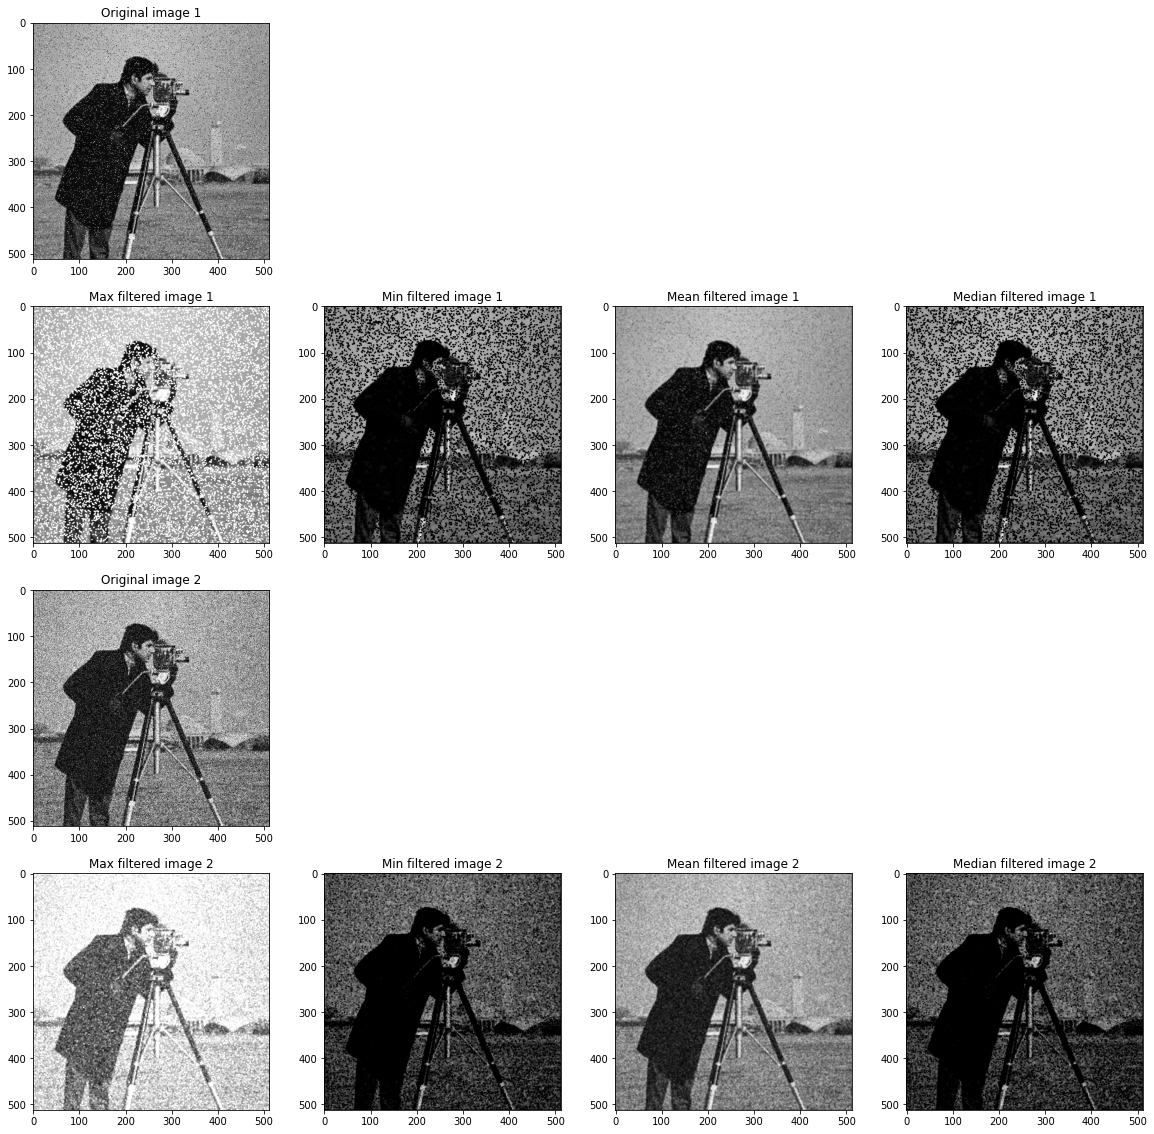

In [90]:
# filter size of 3*3
print("filter size of 3*3")
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,4,1)
plt.imshow(img1)
plt.title("Original image 1")

#max filtered images
fig.add_subplot(4,4,5)
img=maxFilter(img1,3)
plt.imshow(img)
plt.title("Max filtered image 1")

#min filtered images
fig.add_subplot(4,4,6)
img=minFilter(img1,3)
plt.imshow(img)
plt.title("Min filtered image 1")

fig.add_subplot(4,4,7)
img=meanFilter(img1,3)
plt.imshow(img)
plt.title("Mean filtered image 1")

#median filtered images
fig.add_subplot(4,4,8)
img=medianFilter(img1,3)
plt.imshow(img)
plt.title("Median filtered image 1")

fig.add_subplot(4,4,9)
plt.imshow(img2)
plt.title("Original image 2")
#max filtered images
fig.add_subplot(4,4,13)
img=maxFilter(img2,3)
plt.imshow(img)
plt.title("Max filtered image 2")

#min filtered images
fig.add_subplot(4,4,14)
img=minFilter(img2,3)
plt.imshow(img)
plt.title("Min filtered image 2")

#mean filtered images
fig.add_subplot(4,4,15)
img=meanFilter(img2,3)
plt.imshow(img)
plt.title("Mean filtered image 2")

#median filtered images
fig.add_subplot(4,4,16)
img=medianFilter(img2,3)
plt.imshow(img)
plt.title("Median filtered image 2")

filter size of 5*5


Text(0.5, 1.0, 'Median filtered image 2')

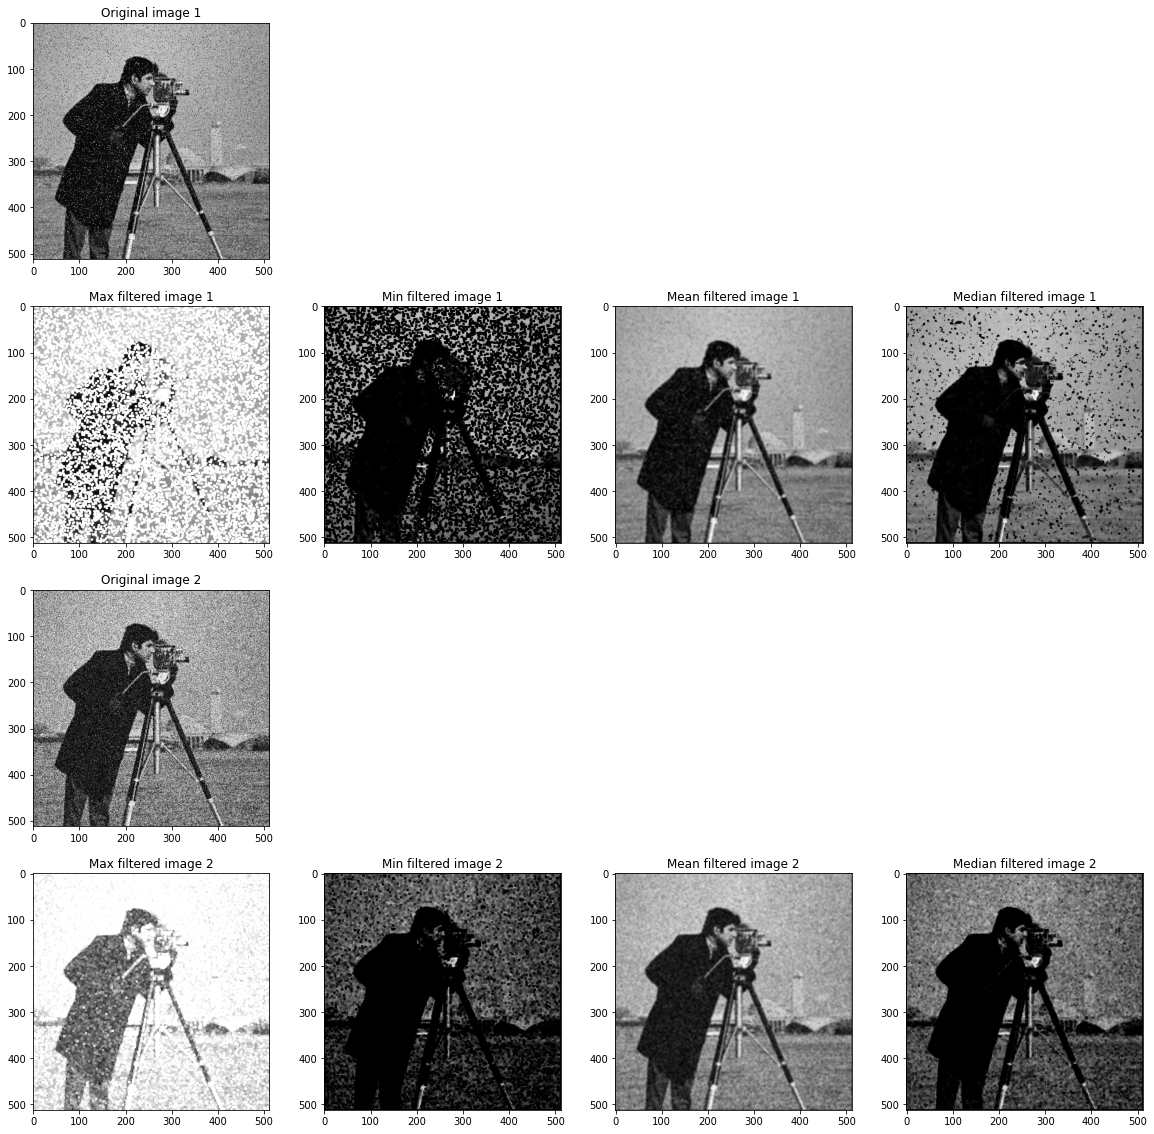

In [89]:
# filter size of 5*5
print("filter size of 5*5")
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,4,1)
plt.imshow(img1)
plt.title("Original image 1")

#max filtered images
fig.add_subplot(4,4,5)
img=maxFilter(img1,5)
plt.imshow(img)
plt.title("Max filtered image 1")

#min filtered images
fig.add_subplot(4,4,6)
img=minFilter(img1,5)
plt.imshow(img)
plt.title("Min filtered image 1")

fig.add_subplot(4,4,7)
img=meanFilter(img1,5)
plt.imshow(img)
plt.title("Mean filtered image 1")

#median filtered images
fig.add_subplot(4,4,8)
img=medianFilter(img1,5)
plt.imshow(img)
plt.title("Median filtered image 1")

fig.add_subplot(4,4,9)
plt.imshow(img2)
plt.title("Original image 2")
#max filtered images
fig.add_subplot(4,4,13)
img=maxFilter(img2,5)
plt.imshow(img)
plt.title("Max filtered image 2")

#min filtered images
fig.add_subplot(4,4,14)
img=minFilter(img2,5)
plt.imshow(img)
plt.title("Min filtered image 2")

#mean filtered images
fig.add_subplot(4,4,15)
img=meanFilter(img2,5)
plt.imshow(img)
plt.title("Mean filtered image 2")

#median filtered images
fig.add_subplot(4,4,16)
img=medianFilter(img2,5)
plt.imshow(img)
plt.title("Median filtered image 2")

**Q6: Write a function Count_hole( ) that takes a black and white image (imghole.jpg) as input and returns 
number of holes in that image. Use morphological and logical operations in the Count_hole() function 
implementation.**
